## Title: (just an example) "Target Profile of Players Who Contribute the Most Data"
### Introduction:
* provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your report
* clearly state the question you tried to answer with your project
* identify and fully describe the dataset that was used to answer the question

Analyzing data from minecraft users...
QUESTION 2.

### Methods & Results:

<center><b>Table 1.</b> Overview of Data with Number of Columns and Observations</center>

| Source File Name | Number of Columns | Total Number of Observations |
|:-:|:-:|:-:|
|players.csv| 7 | 196 |
|sessions.csv| 5 | 1535 | 


<center><b>Table 2.</b> Summary statistics for variables of interest</center>

| Variable Name | Mean | Median | Minimum | Maximum | Number of Observations |
|:-:|:-:|:-:|:-:|:-:|:-:|
|Player Age (years) | 21.14 | 19 | 9 | 58 | 196 |
|Played Hours (hours) | 5.85 | 0.1 | 0 | 223.1 | 196 |
|Elapsed Session Time (minutes) | 50.86 | 30 | 3 | 259 | 1535 |
|Start Date (Month Day)| June 24 | June 24 | April 06 | Sept 26 | 1535 |
|End Date (Month Day)| June 24 | June 23 | April 06 | Sept 26 | 1535 |

* describe the methods you used to perform your analysis from beginning to end that narrates the analysis code.
your report should include code which:
    * loads data 
    * wrangles and cleans the data to the format necessary for the planned analysis
    * performs a summary of the data set that is relevant for exploratory data analysis related to the planned analysis 
    * creates a visualization of the dataset that is relevant for exploratory data analysis related to the planned analysis
    * performs the data analysis
    * creates a visualization of the analysis
       
* note: all figures should have a figure number and a legend
### Discussion:
* summarize what you found
* discuss whether this is what you expected to find
* discuss what impact could such findings have
* discuss what future questions could this lead to
### References
* You may include references if necessary, as long as they all have a consistent citation style.

In [1]:
### Run this cell before continuing.
library(tidyverse)
library(tidymodels)
library(tidyclust)
library(repr)
library(GGally)
library(cowplot)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

#### Read the Datasets from URLs

In [2]:
players_data <- read_csv("https://raw.githubusercontent.com/wojpc/dsci100-project-008-group09/refs/heads/main/Data/players.csv")
sessions_data <- read_csv("https://raw.githubusercontent.com/wojpc/dsci100-project-008-group09/refs/heads/main/Data/sessions.csv")

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
head(players_data)
head(sessions_data)

experience subscribe
1 Pro         TRUE    
2 Veteran     TRUE    
3 Veteran    FALSE    
4 Amateur     TRUE    
5 Regular     TRUE    
6 Amateur     TRUE    
  hashedEmail                                                      played_hours
1 f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d 30.3        
2 f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9  3.8        
3 b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28  0.0        
4 23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5  0.7        
5 7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e  0.1        
6 f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977  0.0        
  name      gender Age
1 Morgan    Male    9 
2 Christian Male   17 
3 Blake     Male   17 
4 Flora     Female 21 
5 Kylie     Male   21 
6 Adrian    Female 17

hashedEmail                                                     
1 bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf
2 36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686
3 f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc
4 bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf
5 36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686
6 bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf
  start_time       end_time         original_start_time original_end_time
1 30/06/2024 18:12 30/06/2024 18:24 1.71977e+12         1.71977e+12      
2 17/06/2024 23:33 17/06/2024 23:46 1.71867e+12         1.71867e+12      
3 25/07/2024 17:34 25/07/2024 17:57 1.72193e+12         1.72193e+12      
4 25/07/2024 03:22 25/07/2024 03:58 1.72188e+12         1.72188e+12      
5 25/05/2024 16:01 25/05/2024 16:12 1.71665e+12         1.71665e+12      
6 23/06/2024 15:08 23/06/2024 17:10 1.71916e+12         1.71916e+12

#### Left Join Data on Hashed Email and Wrangle Time
A new column called session_time is added to show elapsed time of session and times are converted from strings to more usable data. Sessions data is now combined with player information. original_start_time and original_end_time were useless so I removed them to make the table tidier and less redundant. 

In [3]:
sessions_players_joined <- sessions_data |>
  left_join(players_data, by = "hashedEmail")

sessions_players_elapsed <- sessions_players_joined |>
    mutate(end_time = as.POSIXct(end_time, format = "%d/%m/%Y %H:%M"),
           start_time =  as.POSIXct(start_time, format = "%d/%m/%Y %H:%M")) |>
    mutate(session_time_elapsed = as.numeric(end_time - start_time)) |>
    select(-original_start_time, -original_end_time)

head(sessions_players_elapsed)

hashedEmail                                                     
1 bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf
2 36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686
3 f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc
4 bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf
5 36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686
6 bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf
  start_time          end_time            experience subscribe played_hours
1 2024-06-30 18:12:00 2024-06-30 18:24:00 Regular    TRUE      223.1       
2 2024-06-17 23:33:00 2024-06-17 23:46:00 Amateur    TRUE       53.9       
3 2024-07-25 17:34:00 2024-07-25 17:57:00 Amateur    TRUE      150.0       
4 2024-07-25 03:22:00 2024-07-25 03:58:00 Regular    TRUE      223.1       
5 2024-05-25 16:01:00 2024-05-25 16:12:00 Amateur    TRUE       53.9       
6 2024-06-23 15:08:00 2024-06-23 17:10:00 Regular    TRUE      223.1       
  name    gender Age session_time_elapsed
1 Hiroshi Male   17   12                 
2 Alex    Male   17   13                 
3 Delara  Female 16   23                 
4 Hiroshi Male   17   36                 
5 Alex    Male   17   11                 
6 Hiroshi Male   17  122

#### Preliminary Visualizations

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


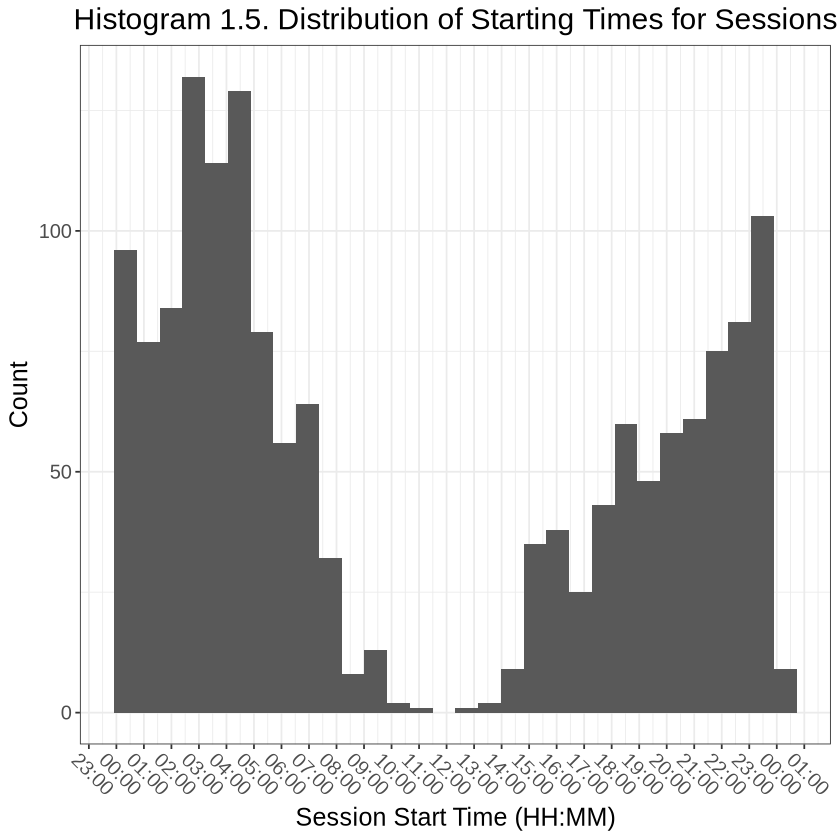

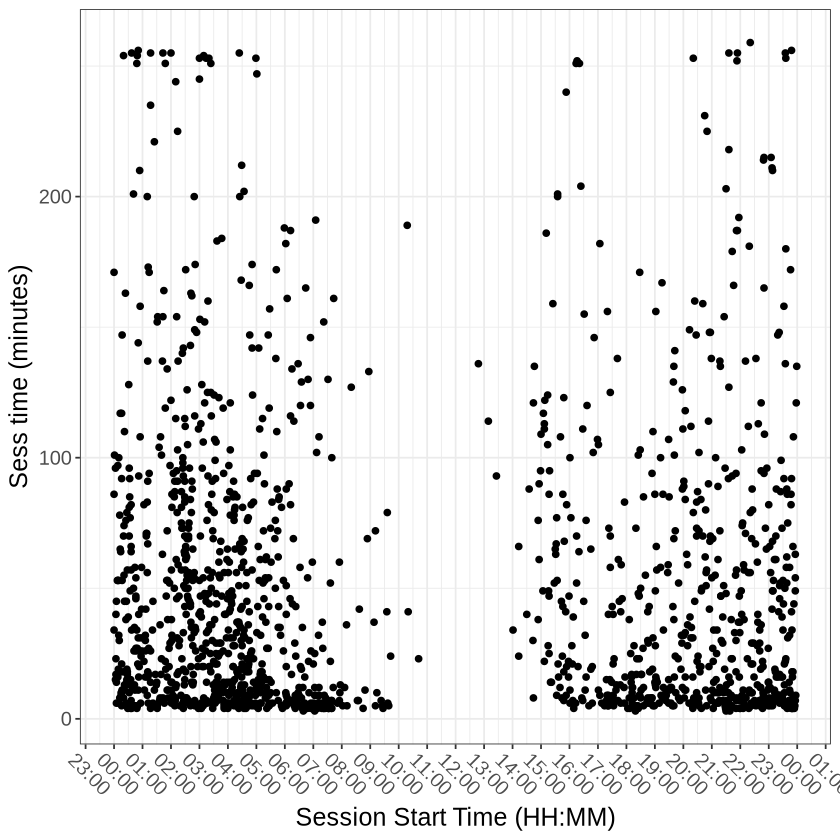

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


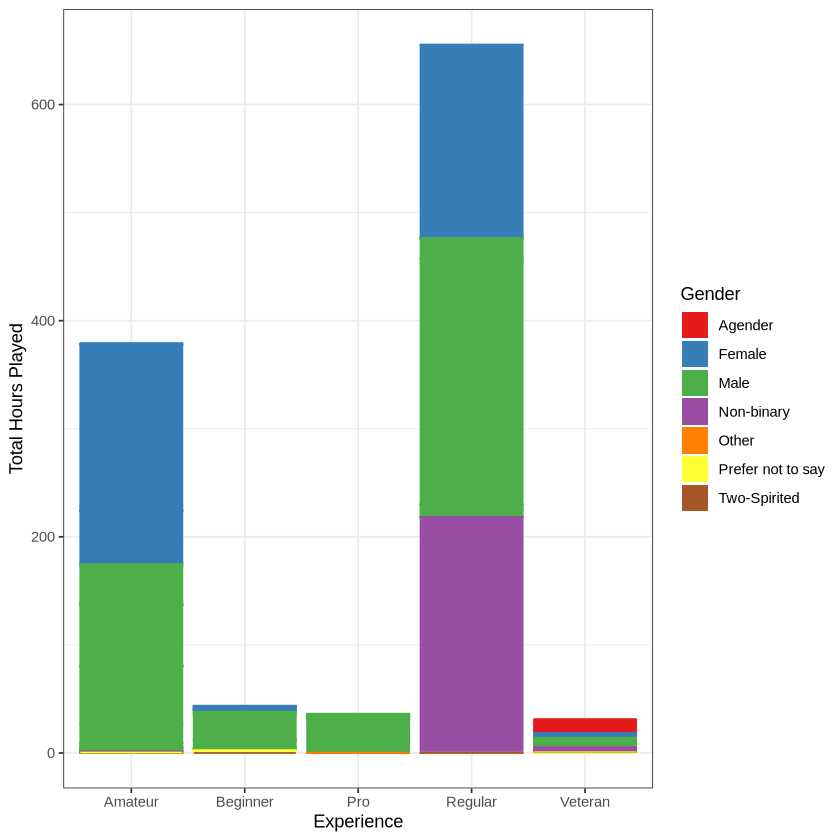

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


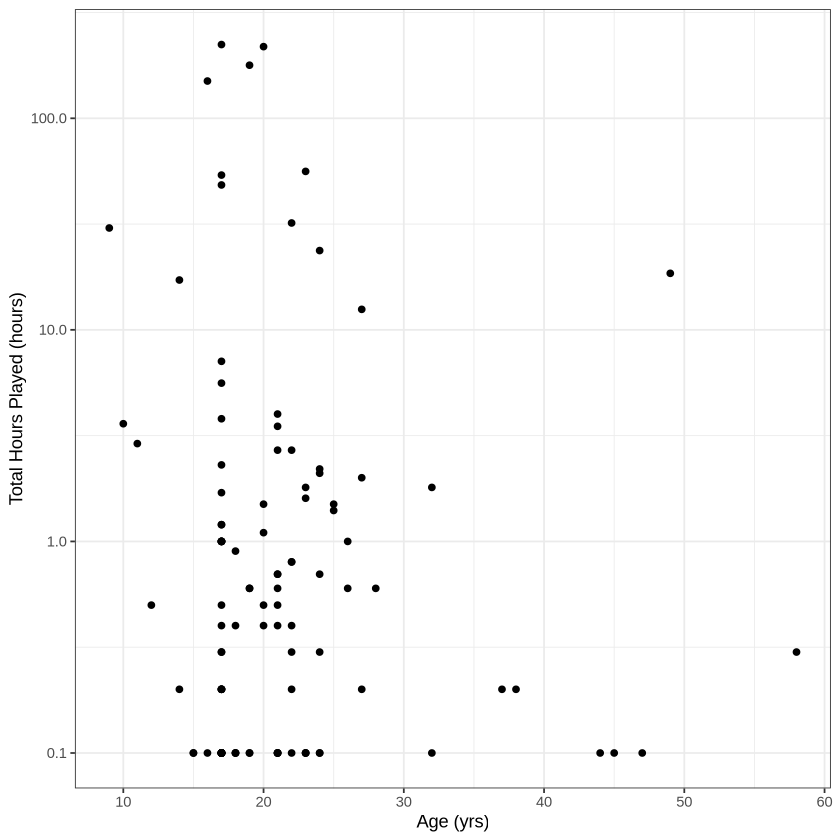

Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 2 rows containing missing values”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 2 rows containing missing values”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 2 rows containing non-finite outside the scale range
(`stat_density()`).”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 4 rows containing missing values”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 4 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 2 rows containing non-finite outside the scale range
(`stat_density()`).”


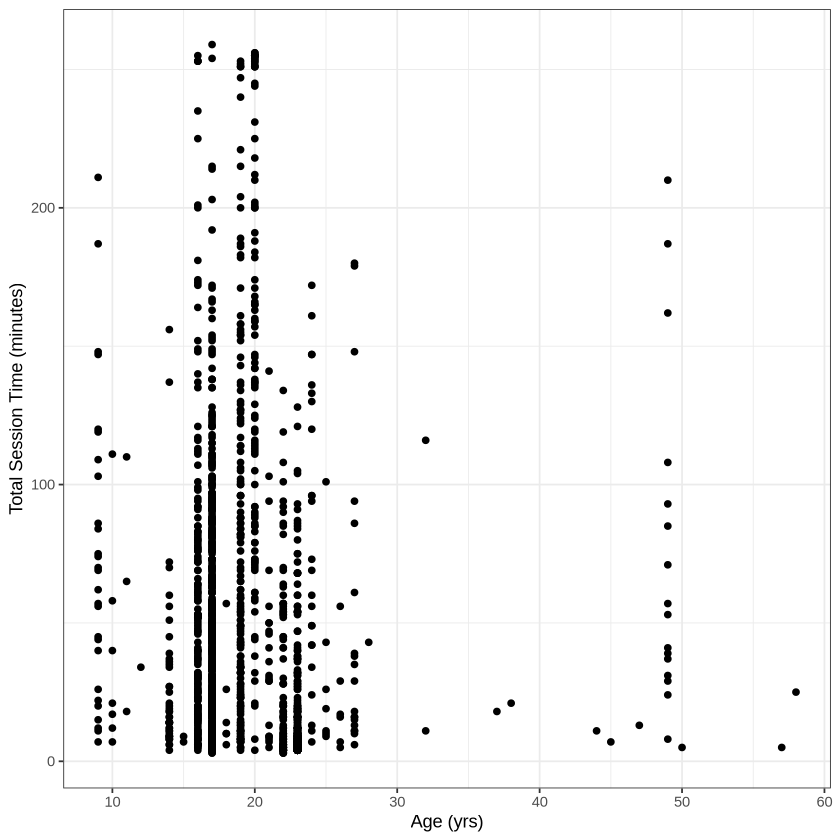

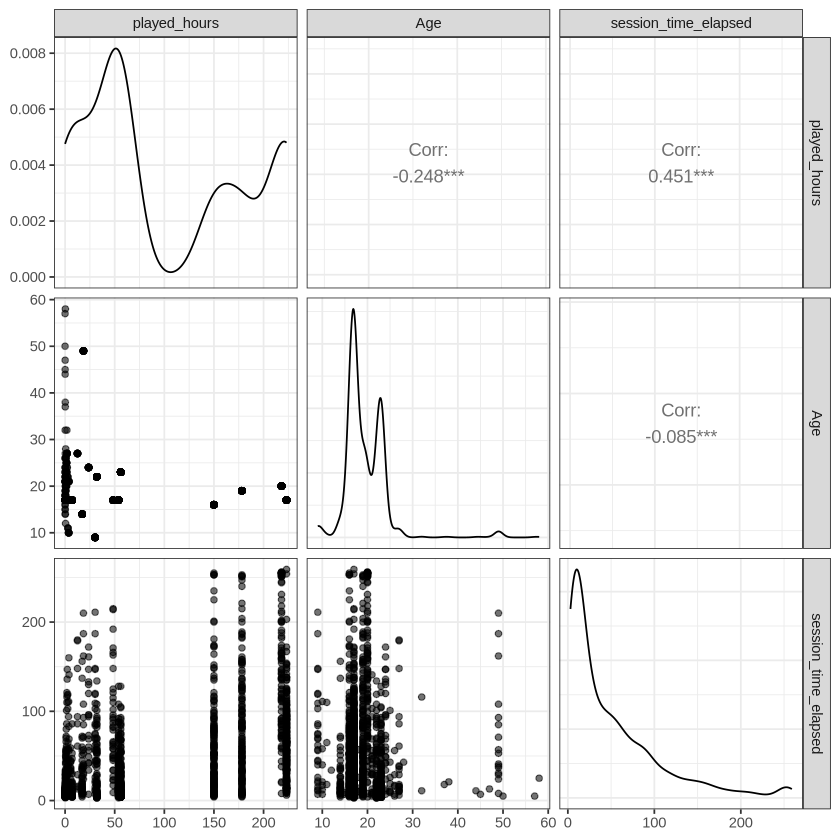

In [5]:
options(repr.plot.width = 7, repr.plot.height = 7)

players_data1 <- filter(players_data, played_hours > 0)
age_vs_hours <- ggplot(players_data1, aes(x = Age, y = played_hours)) +
        geom_point() +
        labs(x = "Age (yrs)",
             y = "Total Hours Played (hours)") +
        scale_y_log10() + theme_bw()

sessions_players_elapsed1 <- filter(sessions_players_elapsed, session_time_elapsed > 0)
age_vs_sesstime <- ggplot(sessions_players_elapsed1, aes(x = Age, y = session_time_elapsed)) +
        geom_point() +
        labs(x = "Age (yrs)",
             y = "Total Session Time (minutes)") + theme_bw()

players_data_col <- select(players_data, experience, played_hours, gender)
experience_playtime <- ggplot(players_data_col, aes(x = experience, 
                                                y = played_hours,
                                                color = gender,
                                                fill = gender)) +
        geom_col() +
        labs(x = "Experience",
             y = "Total Hours Played",
             fill = "Gender") +
        scale_fill_brewer(palette = "Set1") +
        scale_color_brewer(palette = "Set1") +
        guides(color = "none") + theme_bw()

player_pairs <- sessions_players_elapsed |> select(played_hours, Age, session_time_elapsed) |>
    ggpairs(aes(alpha = 0.05)) +
    theme(text = element_text(size = 20)) + theme_bw() 

# Isolate the times when playing starts and ignore dates
starting_times <- sessions_players_elapsed |>
    mutate(start_times = as.POSIXct(format(start_time, "%H:%M"),
      format = "%H:%M", tz = "UTC"),
          feature_sin = sin(2 * pi * hour(start_times) / 24),
feature_cos = cos(2 * pi * hour(start_times) / 24))

session_time_plot2 <- starting_times |> 
    ggplot(aes(x = start_times)) +
    geom_histogram() +
    labs(x = "Session Start Time (HH:MM)",
        y = "Count",
        title = "Histogram 1.5. Distribution of Starting Times for Sessions") +
    scale_x_datetime(date_labels = "%H:%M",
                    date_breaks = "1 hour") +
    theme_bw() +
    theme(text = element_text(size = 15),
         plot.title = element_text(hjust = 0.5),
         axis.text.x = element_text(angle = -45,
                                  vjust = 0.1))

start_vs_sesslen <- ggplot(starting_times, aes(x = start_times, y = session_time_elapsed)) +
        geom_point() +
        labs(x = "Session Start Time (HH:MM)",
             y = "Sess time (minutes)") +
        scale_x_datetime(date_labels = "%H:%M",
                         date_breaks = "1 hour") + theme_bw() +
theme(text = element_text(size = 15),
         plot.title = element_text(hjust = 0.5),
         axis.text.x = element_text(angle = -45,
                                  vjust = 0.1))

sintime_vs_sesslen <- ggplot(starting_times, aes(x = feature_sin, y = session_time_elapsed)) +
        geom_point() +
        labs(x = "Sine Time",
             y = "Total Hours Played (hours)")


costime_vs_sesslen <- ggplot(starting_times, aes(x = feature_cos, y = session_time_elapsed)) +
        geom_point() +
        labs(x = "Cos Time",
             y = "Total Hours Played (hours)")


session_time_plot2
start_vs_sesslen
experience_playtime
age_vs_hours
age_vs_sesstime
player_pairs

#### kNN Means Clustering for Total Hours Played

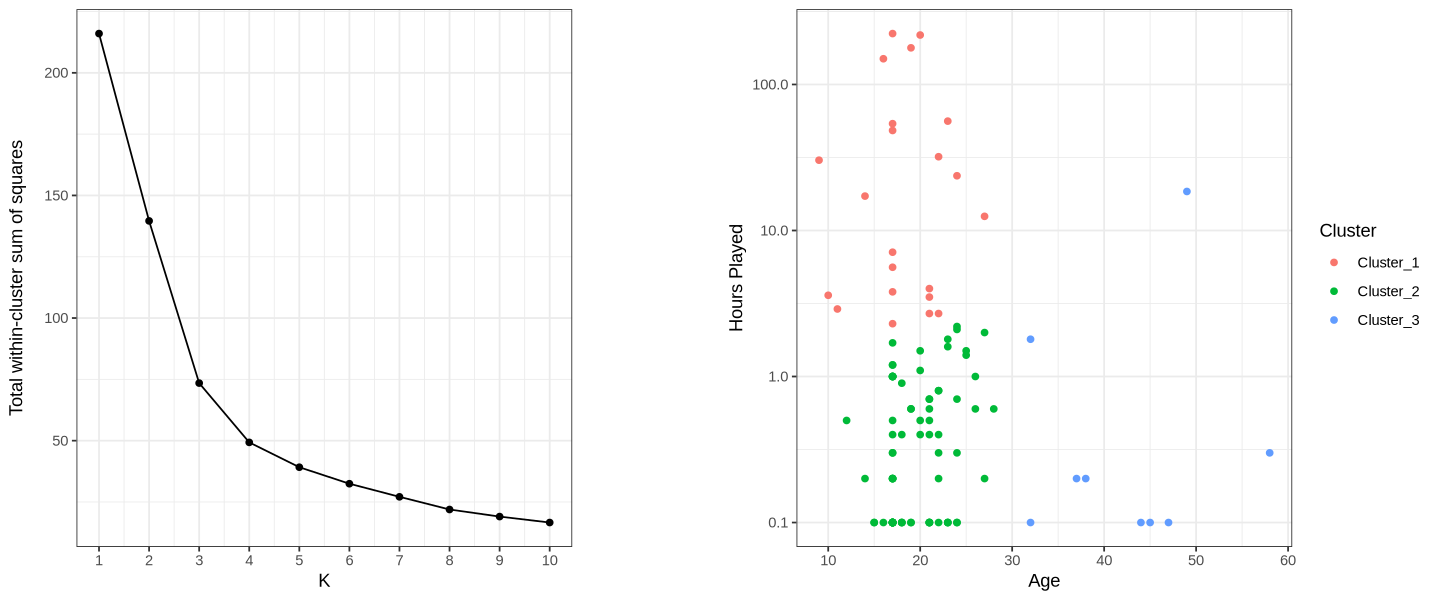

In [6]:
#Set seed for consistent reproduction 
set.seed(888)

#Plot size
options(repr.plot.width = 12, repr.plot.height = 5)

## Tune for best k##
total_played_clustdata <- players_data |> 
    select(Age, played_hours) |> 
    filter(played_hours > 0) |>
    filter(!is.na(Age))

total_played_recipe <- recipe(~ ., total_played_clustdata) |>
    step_log(played_hours, base = 10) |>
    step_scale(all_predictors(), na_rm = TRUE) |>
    step_center(all_predictors(), na_rm = TRUE)

ks <- tibble(num_clusters = 1:10) 

player_spec_nstart <- k_means(num_clusters = tune()) |>
    set_engine("stats", nstart = 100)

elbow_stats <- workflow() |>
    add_recipe(total_played_recipe) |>
    add_model(player_spec_nstart) |>
    tune_cluster(resamples = apparent(total_played_clustdata), grid = ks) |>
    collect_metrics() |>
    filter(.metric == "sse_within_total") |>
    mutate(total_WSSD = mean) |>
    select(num_clusters, total_WSSD)
    
elbow_plot <- elbow_stats |>
    ggplot(aes(x = num_clusters, y = total_WSSD)) +
    geom_point() +
    geom_line() +
    labs(x = "K",
        y = "Total within-cluster sum of squares") +
    theme(text = element_text(size = 15)) +
    scale_x_continuous(breaks = 1:10)

## Clustering with Optimal K ##
total_played_spec <- k_means(num_clusters = 3) |>
    set_engine("stats")

total_played_clustering <- workflow() |>
    add_recipe(total_played_recipe) |>
    add_model(total_played_spec) |>
    fit(data = total_played_clustdata)

clustered_players <- augment(total_played_clustering, total_played_clustdata)

clustering_plot <- clustered_players |>
    ggplot(aes(x = Age, y = played_hours, color = .pred_cluster)) +
    geom_point() +
    labs(x = "Age",
        y = "Hours Played",
        color = "Cluster") +
    scale_y_log10()

plot_grid(elbow_plot + theme_bw(), clustering_plot + theme_bw(), align = "hv")

#### kNN Means Clustering for Session Times

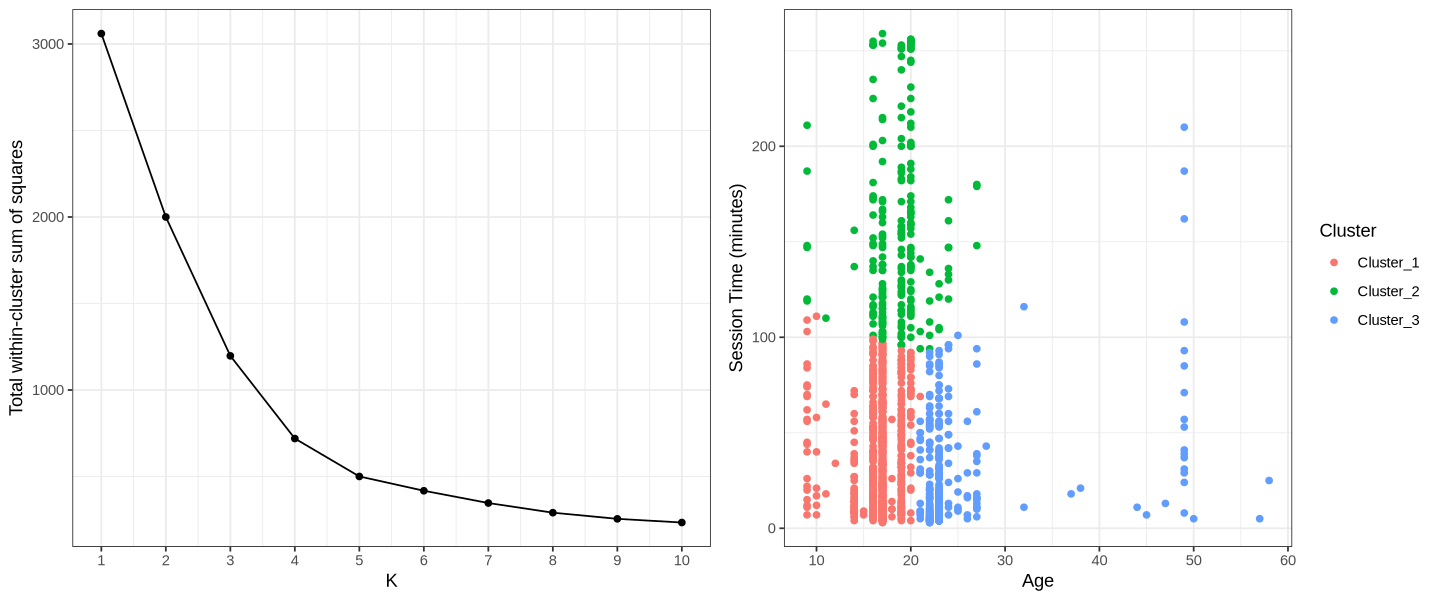

In [7]:
#Set seed for consistent reproduction 
set.seed(888)

#Plot size
options(repr.plot.width = 12, repr.plot.height = 5)

## Tune for best k##
sess_clustdata <- sessions_players_elapsed |> 
    select(Age, session_time_elapsed) |>
     filter(!is.na(Age), !is.na(session_time_elapsed))

sess_recipe <- recipe(~ ., sess_clustdata) |>
    step_scale(all_predictors(), na_rm = TRUE) |>
    step_center(all_predictors(), na_rm = TRUE)

ks <- tibble(num_clusters = 1:10) 

sess_spec_nstart <- k_means(num_clusters = tune()) |>
    set_engine("stats", nstart = 100)

elbow_stats_sess <- workflow() |>
    add_recipe(sess_recipe) |>
    add_model(sess_spec_nstart) |>
    tune_cluster(resamples = apparent(sess_clustdata), grid = ks) |>
    collect_metrics() |>
    filter(.metric == "sse_within_total") |>
    mutate(total_WSSD = mean) |>
    select(num_clusters, total_WSSD)
    
elbow_plot_sess <- elbow_stats_sess |>
    ggplot(aes(x = num_clusters, y = total_WSSD)) +
    geom_point() +
    geom_line() +
    labs(x = "K",
        y = "Total within-cluster sum of squares") +
    theme(text = element_text(size = 15)) +
    scale_x_continuous(breaks = 1:10)

## Clustering with Optimal K ##
sess_spec <- k_means(num_clusters = 3) |>
    set_engine("stats")

sess_clustering <- workflow() |>
    add_recipe(sess_recipe) |>
    add_model(sess_spec) |>
    fit(data = sess_clustdata)

clustered_sess <- augment(sess_clustering, sess_clustdata)

clustering_plot_sess <- clustered_sess |>
    ggplot(aes(x = Age, y = session_time_elapsed, color = .pred_cluster)) +
    geom_point() +
    labs(x = "Age",
        y = "Session Time (minutes)",
        color = "Cluster")


plot_grid(elbow_plot_sess + theme_bw(), clustering_plot_sess + theme_bw())

#### Clustering for Age, Session Time and Total Play Time

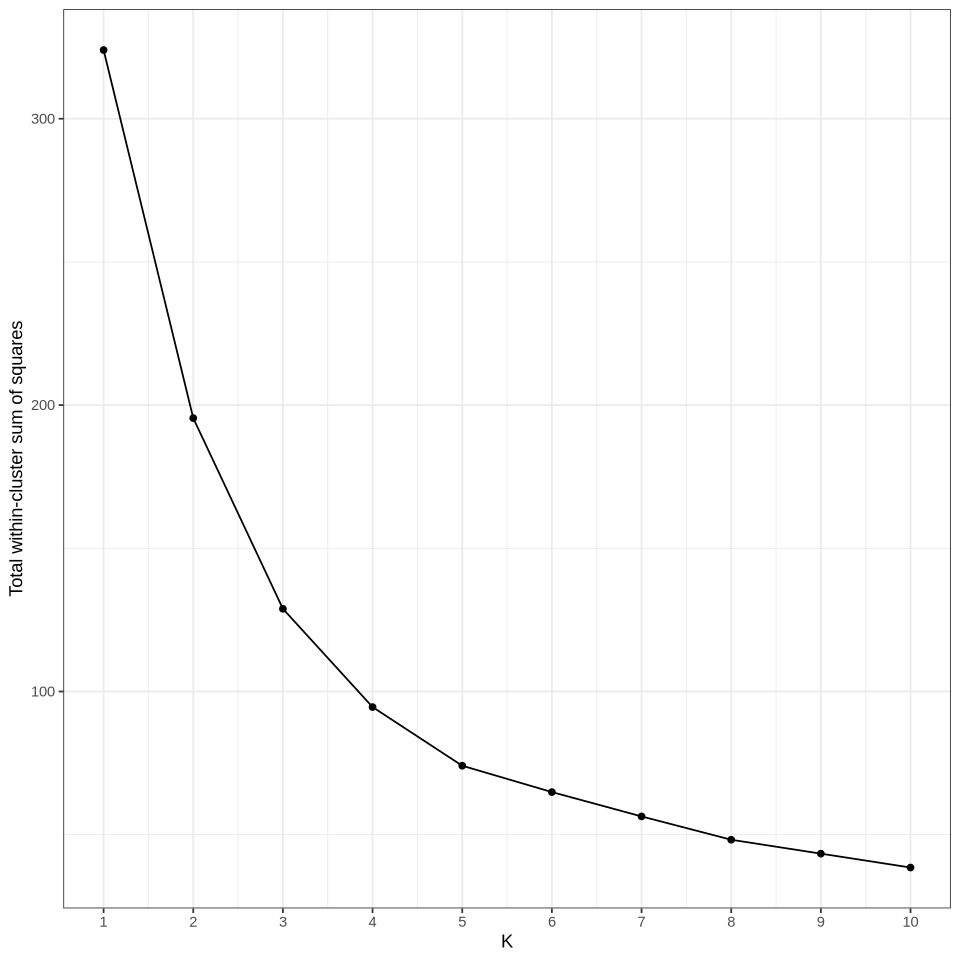

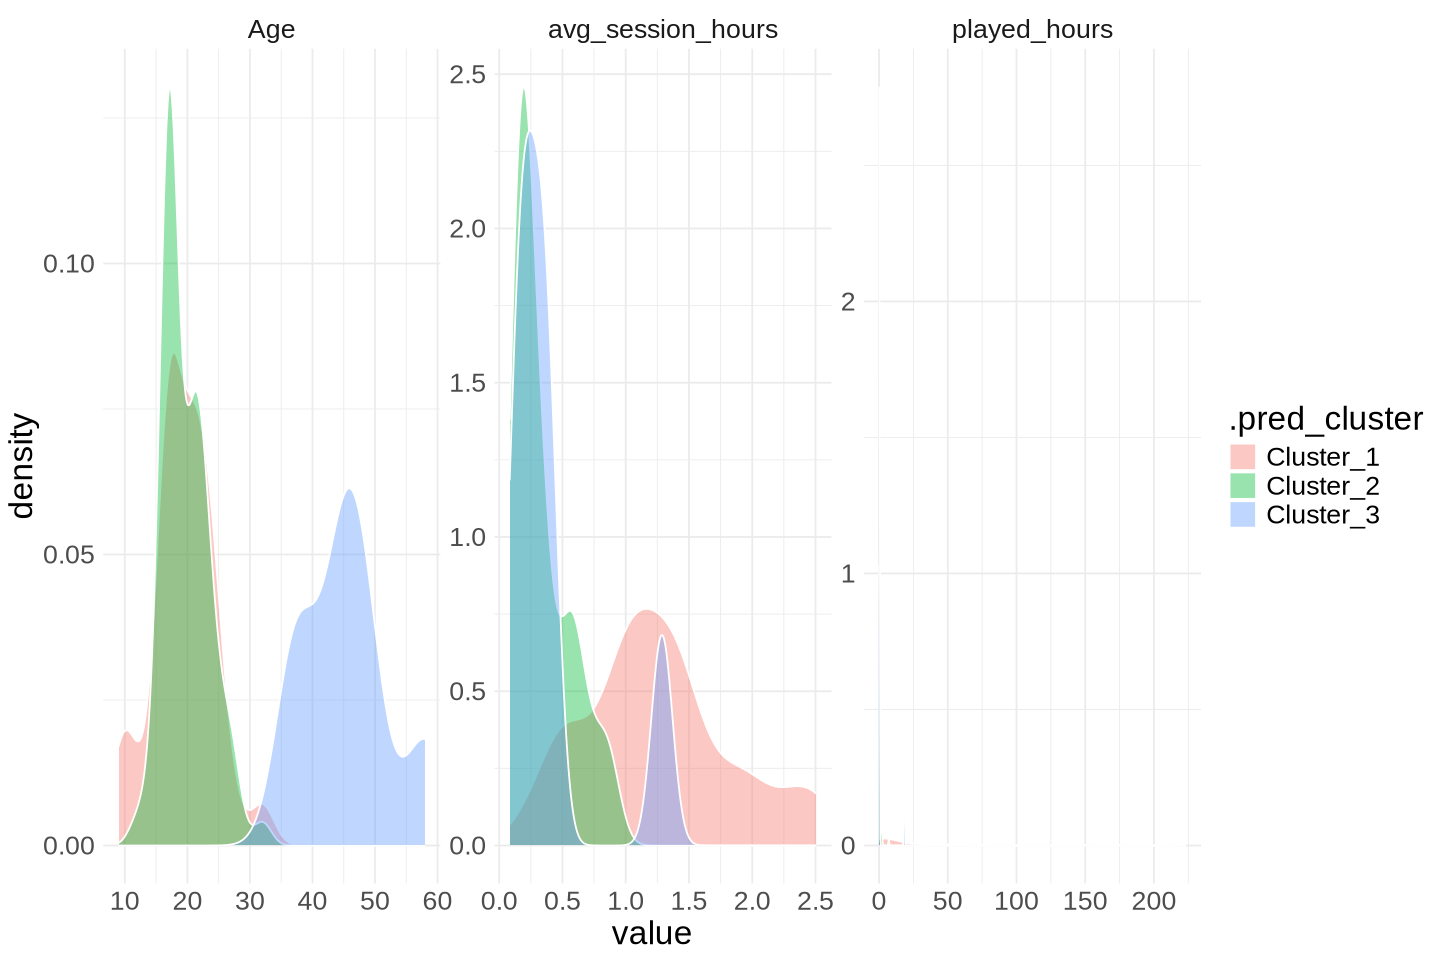

In [17]:
#Set seed for consistent reproduction 
set.seed(888)

#Plot size
options(repr.plot.width = 8, repr.plot.height = 8)

## Tune for best k ##
avg_sesstime <- sessions_players_elapsed |>
    select(name, Age, session_time_elapsed, played_hours) |>
    filter(!is.na(Age), 
           !is.na(session_time_elapsed), 
           !is.na(played_hours),
           !is.nan(played_hours)) |>
    filter(played_hours > 0) |>
    group_by(name) |>
    summarize(avg_session_mins = mean(session_time_elapsed))

ast_clustdata <- left_join(players_data, avg_sesstime, by = "name") |> 
    filter(!is.na(avg_session_mins)) |> 
    mutate(avg_session_hours = avg_session_mins / 60) |>
    select(Age, played_hours, avg_session_hours)

#ast_clustdata

ast_recipe <- recipe(~ ., ast_clustdata) |>
    step_log(played_hours, base = 10) |>
    step_scale(all_predictors(), na_rm = TRUE) |>
    step_center(all_predictors(), na_rm = TRUE)

ks <- tibble(num_clusters = 1:10) 

ast_spec_nstart <- k_means(num_clusters = tune()) |>
    set_engine("stats", nstart = 100)

elbow_stats_ast <- workflow() |>
    add_recipe(ast_recipe) |>
    add_model(ast_spec_nstart) |>
    tune_cluster(resamples = apparent(ast_clustdata), grid = ks) |>
    collect_metrics() |>
    filter(.metric == "sse_within_total") |>
    mutate(total_WSSD = mean) |>
    select(num_clusters, total_WSSD)
    
elbow_plot_ast <- elbow_stats_ast |>
    ggplot(aes(x = num_clusters, y = total_WSSD)) +
    geom_point() +
    geom_line() +
    labs(x = "K",
        y = "Total within-cluster sum of squares") +
    theme(text = element_text(size = 15)) +
    scale_x_continuous(breaks = 1:10) + theme_bw()

## Clustering with Optimal K ##
ast_spec <- k_means(num_clusters = 3) |>
    set_engine("stats")

ast_clustering <- workflow() |>
    add_recipe(ast_recipe) |>
    add_model(ast_spec) |>
    fit(data = ast_clustdata)

clustered_sess <- augment(ast_clustering, ast_clustdata)

clustered_sess_density <- clustered_sess  |>
    pivot_longer(cols = -.pred_cluster, names_to = 'category', values_to = 'value')  |> 
    ggplot(aes(value, fill = .pred_cluster)) +
        geom_density(alpha = 0.4, colour = 'white') +
        facet_wrap(facets = vars(category), scales = 'free') +
        theme_minimal() +
        theme(text = element_text(size = 20))

elbow_plot_ast

options(repr.plot.width = 12, repr.plot.height = 8)
clustered_sess_density

#### Bootstrapping and Inference for the Mean

[1] 21.13918

2.5%    97.5% 
20.09936 22.23253

[1] 5.845918

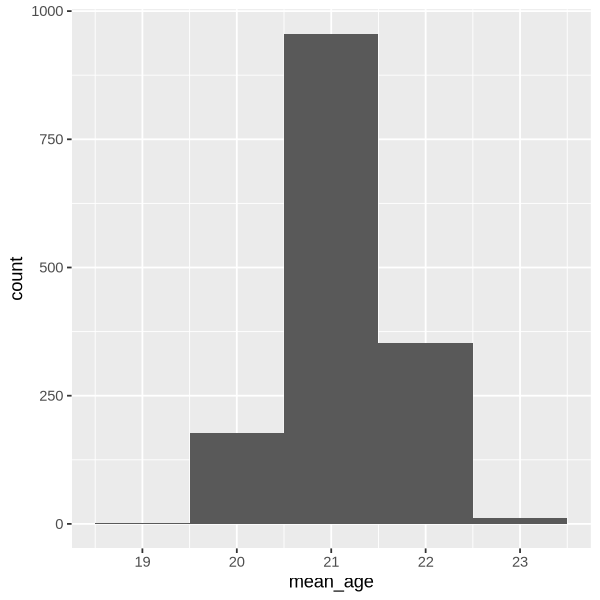

2.5%     97.5% 
 2.386505 10.350000

[1] 50.85845

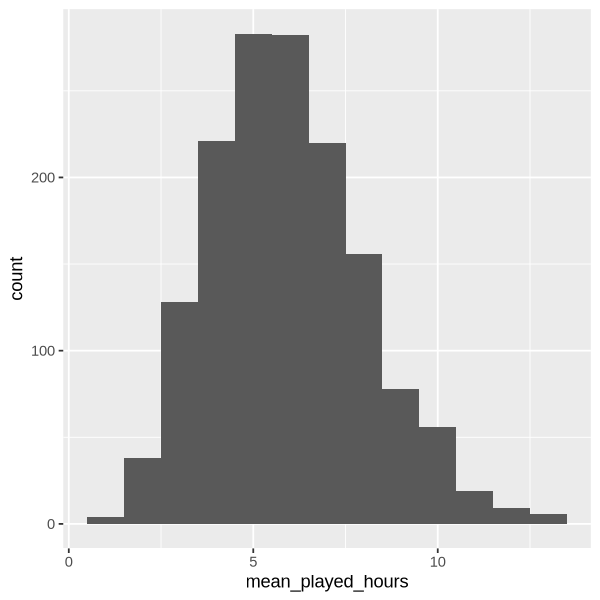

2.5%    97.5% 
48.36099 53.52097

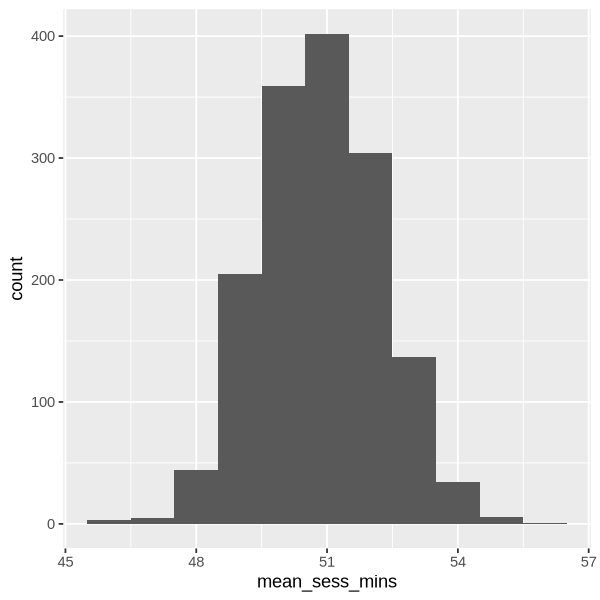

In [17]:
#Set seed for consistent reproduction 
set.seed(888)
options(repr.plot.width = 5, repr.plot.height = 5)

## Age
age_mean <- mean(players_data$Age, na.rm = TRUE)

ages <- players_data |>
        filter(!is.na(Age))|>
        select(Age)

samples_age <- rep_sample_n(ages, size = 196, reps = 1500, replace = TRUE) |>
    group_by(replicate) |>
    summarize(mean_age = mean(Age))

age_mean
ggplot(samples_age, aes(x = mean_age)) +
    geom_histogram(binwidth = 1)

samples_age |> 
    select(mean_age) |> 
    pull() |>
    quantile(c(0.025, 0.975))

## Hours Played
played_mean <- mean(players_data$played_hours, na.rm = TRUE)

played_data <- players_data |>
        filter(!is.na(played_hours))|>
        select(played_hours)

samples_played <- rep_sample_n(played_data, size = 196, reps = 1500, replace = TRUE) |>
    group_by(replicate) |>
    summarize(mean_played_hours = mean(played_hours))

played_mean
ggplot(samples_played, aes(x = mean_played_hours)) +
    geom_histogram(binwidth = 1)

samples_played |> 
    select(mean_played_hours) |> 
    pull() |>
    quantile(c(0.025, 0.975))

## Session Time (Minutes)
sess_mean <- mean(sessions_players_elapsed$session_time_elapsed, na.rm = TRUE)

sess_data <- sessions_players_elapsed |>
        filter(!is.na(session_time_elapsed))|>
        select(session_time_elapsed)

samples_sess <- rep_sample_n(sess_data, size = 1533, reps = 1500, replace = TRUE) |>
    group_by(replicate) |>
    summarize(mean_sess_mins = mean(session_time_elapsed))

sess_mean
ggplot(samples_sess, aes(x = mean_sess_mins)) +
    geom_histogram(binwidth = 1)

samples_sess |> 
    select(mean_sess_mins) |> 
    pull() |>
    quantile(c(0.025, 0.975))
